In [10]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

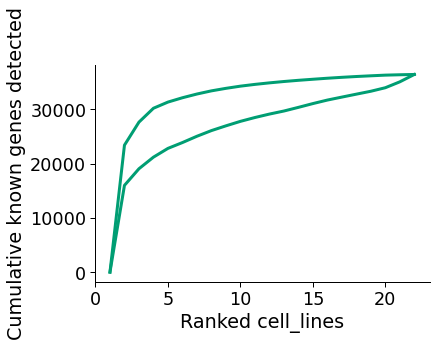

In [11]:
df = pd.read_csv('../../lr_bulk/talon/human_talon_abundance.tsv', sep='\t')
_, _ = plot_ranked_biosamp(df,
                    sample='cell_line',
                    how='gene', 
                    nov='Known',
                    opref='figures/')

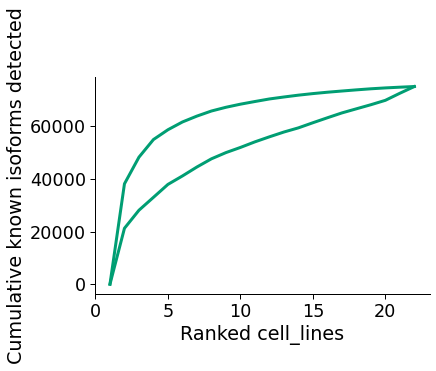

In [12]:
df = pd.read_csv('../../lr_bulk/talon/human_talon_abundance_filtered.tsv', sep='\t')
_, _ = plot_ranked_biosamp(df,
                    sample='cell_line',
                    how='iso', 
                    nov='Known',
                    opref='figures/')

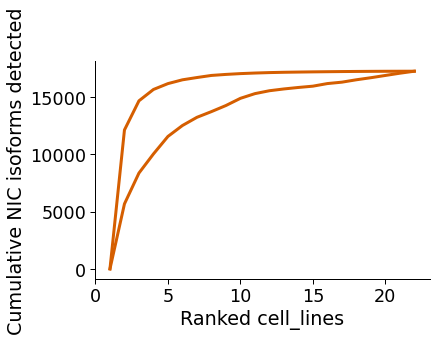

In [13]:
df = pd.read_csv('../../lr_bulk/talon/human_talon_abundance_filtered.tsv', sep='\t')
_, _ = plot_ranked_biosamp(df,
                    sample='cell_line',
                    how='iso', 
                    nov='NIC',
                    opref='figures/')

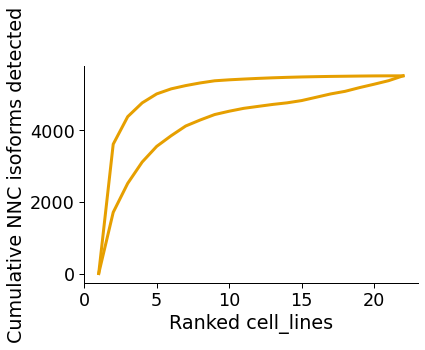

In [14]:
df = pd.read_csv('../../lr_bulk/talon/human_talon_abundance_filtered.tsv', sep='\t')
_, _ = plot_ranked_biosamp(df,
                    sample='cell_line',
                    how='iso', 
                    nov='NNC',
                    opref='figures/')